In [14]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt

# Helpers
from SimEx.Utilities.Units import meter, electronvolt, joule, radian

# PMI
from SimEx.Calculators.XMDYNDemoPhotonMatterInteractor import XMDYNDemoPhotonMatterInteractor

# Diffraction
from SimEx.Parameters.DetectorGeometry import DetectorGeometry, DetectorPanel
from SimEx.Parameters.SingFELPhotonDiffractorParameters import SingFELPhotonDiffractorParameters
from SimEx.Calculators.SingFELPhotonDiffractor import SingFELPhotonDiffractor

# Analysis
from SimEx.Analysis.XFELPhotonAnalysis import XFELPhotonAnalysis
from SimEx.Analysis.DiffractionAnalysis import DiffractionAnalysis

## Data path setup

In [15]:
data_path = '../../../data/simulation/'

## Propogration output

In [16]:
prop_path = os.path.join(data_path,'prop/prop_out_9fs_5keV_from_CHY.h5')
prop_analysis=XFELPhotonAnalysis(input_path=prop_path)


 Start initialization.

 Loading wavefront from ../../../data/simulation/prop/prop_out_9fs_5keV_from_CHY.h5.
 ... done.

 Getting intensities.
 ... done.
 Data dimensions =  (150, 150, 651)

 Masking NANs.
 ... done.



 Plotting total power.

 Switching to frequency domain.


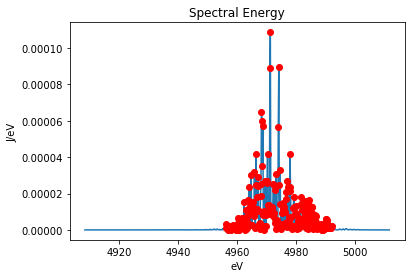

In [4]:
prop_analysis.plotTotalPower(spectrum=True)

## Photon-mater-interaction

In [5]:
pmi_parameters={"number_of_trajectories" : 1,
                "random_rotation" : False}
photon_matter_interactor=XMDYNDemoPhotonMatterInteractor(parameters=pmi_parameters,
                                                         input_path=prop_path,
                                                         output_path='pmi',
                                                         sample_path='3WUL.pdb')
photon_matter_interactor.backengine()
photon_matter_interactor.saveH5()

Previous module:  prop
  NOT: data
  NOT: history
info
misc
params
version
['arrEhor', 'arrEver']
[('arrEhor', <HDF5 dataset "arrEhor": shape (150, 150, 651, 2), type "<f4">), ('arrEver', <HDF5 dataset "arrEver": shape (150, 150, 651, 2), type "<f4">)]


## Detector Setting

In [6]:
p0 = DetectorPanel(
            ranges={
                'fast_scan_min': 0,
                'fast_scan_max': 100,
                'slow_scan_min': 0,
                'slow_scan_max': 100
            },
            pixel_size=2200e-6 * meter,
            photon_response=1.0,
            distance_from_interaction_plane=0.13 * meter,
            corners={
                'x': -50,
                'y': 5
            },
            fast_scan_xyz = '1.0x',
            slow_scan_xyz = '1.0y'
        )
p1 = DetectorPanel(
            ranges={
                'fast_scan_min': 0,
                'fast_scan_max': 100,
                'slow_scan_min': 0,
                'slow_scan_max': 100
            },
            pixel_size=2200e-6 * meter,
            photon_response=1.0,
            distance_from_interaction_plane=0.25 * meter,
            corners={
                'x': -50,
                'y': -105
            },
            fast_scan_xyz = '1.0x',
            slow_scan_xyz = '1.0y'
        )
detector_geometry = DetectorGeometry(panels=[p0,p1])

In [7]:
detector_geometry.serialize()

;panel 0
panel0/min_fs         = 0
panel0/max_fs         = 100
panel0/min_ss         = 0
panel0/max_ss         = 100
panel0/corner_y       = 5
panel0/fs             = 1.0x
panel0/ss             = 1.0y
panel0/clen           = 1.3000000e-01
panel0/res            = 4.5454545e+02
panel0/coffset        = 0.0000000e+00
panel0/adu_per_photon = 1.0000000e+00
panel0/max_adu        = 1.0000000e+04
panel0/px             = 101
panel0/py             = 101
panel0/pix_width      = 2.2000000e-03
panel0/d              = 1.3000000e-01
panel0/corner_x       = -50

;panel 1
panel1/min_fs         = 0
panel1/max_fs         = 100
panel1/min_ss         = 0
panel1/max_ss         = 100
panel1/corner_y       = -105
panel1/fs             = 1.0x
panel1/ss             = 1.0y
panel1/clen           = 2.5000000e-01
panel1/res            = 4.5454545e+02
panel1/coffset        = 0.0000000e+00
panel1/adu_per_photon = 1.0000000e+00
panel1/max_adu        = 1.0000000e+04
panel1/px             = 101
panel1/py             = 10

## Clean up previous diffraction run

In [8]:
dirs_to_remove=['diffr']
files_to_remove=['diffr.h5']

for d in dirs_to_remove:
    if os.path.isdir(d):
        shutil.rmtree(d)
for f in files_to_remove:
    if os.path.isfile(f):
        os.remove(f)

## Diffractor Settings

In [17]:
diffraction_parameters = SingFELPhotonDiffractorParameters(
                                               uniform_rotation=False,
                                               slice_interval=1,
                                               number_of_slices=1,
                                               number_of_diffraction_patterns=1,
                                               detector_geometry=detector_geometry,
                                               forced_mpi_command='mpirun -np 1',
                                              )

In [18]:
diffractor = SingFELPhotonDiffractor(parameters=diffraction_parameters,
                                     input_path='pmi',
                                     output_path="diffr")

In [21]:
diffractor._run()
diffractor.saveH5()

IsADirectoryError: [Errno 21] Is a directory: '/gpfs/exfel/data/user/juncheng/crystalProject/src/controller/TestSimEx/pmi'

In [12]:
H5Glance('diffr/diffr_out_0000001.h5')

In [13]:
with h5py.File('diffr.h5','r') as f:
    for i,iteration in enumerate(f['data']):
        if i > 1:
            break
        data = f['data'][iteration]['data'][...]
        diffr = f['data'][iteration]['diffr'][...]
        plt.imshow(diffr)

KeyError: "Unable to open object (object 'data' doesn't exist)"

## Conclusion
Got data with 0 values